## Regresión Lineal


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import zipfile
import os

In [5]:
zip_path = "archive (1).zip"  
extract_path = "datos_carros"

In [7]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [9]:
archivos = os.listdir(extract_path)
rutas = [os.path.join(extract_path, archivo) for archivo in archivos if archivo.endswith(".csv")]
dataframes = [pd.read_csv(ruta) for ruta in rutas]

df = pd.concat(dataframes, ignore_index=True).drop_duplicates()

In [11]:
df_modelo = df[["year", "km_driven", "selling_price"]].dropna()

X = df_modelo[["year", "km_driven"]]
y = df_modelo["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [15]:
print("Coeficientes:")
for nombre, coef in zip(X.columns, modelo.coef_):
    print(f"{nombre}: {coef:.2f}")

print(f"\nIntercepto: {modelo.intercept_:.2f}")
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coeficiente de determinación (R²): {r2_score(y_test, y_pred):.2f}")

Coeficientes:
year: 52957.06
km_driven: -0.04

Intercepto: -106111425.89
Error cuadrático medio (MSE): 213220024808.07
Coeficiente de determinación (R²): 0.20


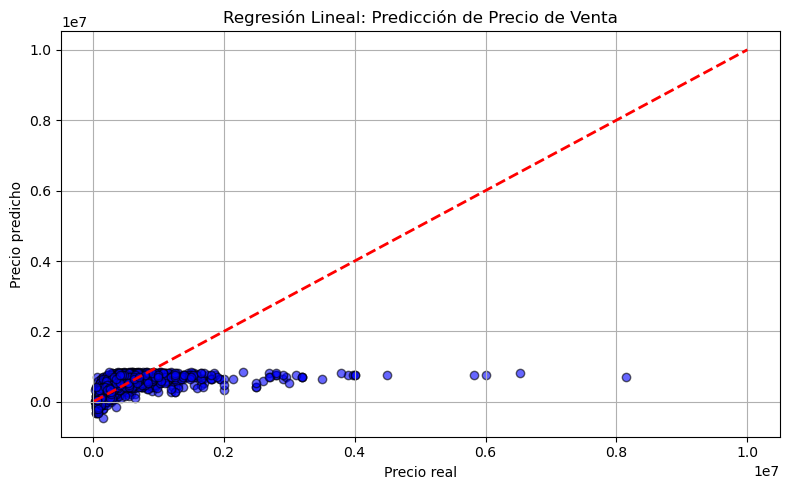

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, edgecolors='k', alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Regresión Lineal: Predicción de Precio de Venta")
plt.grid(True)
plt.tight_layout()
plt.show()